### Reading Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
df_1718 = pd.read_csv('Data/transfermarkt_fbref_201718.csv', delimiter=';', index_col=0)
df_1819 = pd.read_csv('Data/transfermarkt_fbref_201819.csv', delimiter=';', index_col=0)
df_1920 = pd.read_csv('Data/transfermarkt_fbref_201920.csv', delimiter=';', index_col=0)

C:\Users\ubfil\anaconda3\envs\env\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (395) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
df_1718.head()

,player,nationality,position,squad,age,birth_year,value,height,position2,foot,...,Pts/G,xG,xGA,xGDiff,xGDiff/90,Attendance,CL,WinCL,CLBestScorer,Season
379,Burgui,es ESP,"FW,MF",Alavés,23,1993,1800000,186,attack - Left Winger,right,...,1.24,39.0,53.2,-14.2,-0.37,"16,819",0,0,0,201718#
2530,Raphaël Varane,fr FRA,DF,Real Madrid,24,1993,70000000,191,Defender - Centre-Back,right,...,2.00,83.3,45.4,37.9,1.00,66161,1,1,0,201718#
721,Rubén Duarte,es ESP,DF,Alavés,21,1995,2000000,179,Defender - Left-Back,left,...,1.24,39.0,53.2,-14.2,-0.37,"16,819",0,0,0,201718#
2512,Samuel Umtiti,fr FRA,DF,Barcelona,23,1993,60000000,182,Defender - Centre-Back,left,...,2.45,78.3,41.1,37.2,0.98,66603,1,0,0,201718#
882,Manu García,es ESP,MF,Alavés,31,1986,1800000,183,midfield - Defensive Midfield,left,...,1.24,39.0,53.2,-14.2,-0.37,"16,819",0,0,0,201718#


In [4]:
df_1718['year'] = 2017
df_1819['year'] = 2018
df_1920['year'] = 2019

In [5]:
df = pd.concat([df_1718, df_1819, df_1920])
df.shape

(7108, 400)

In [6]:
df.head()

,player,nationality,position,squad,age,birth_year,value,height,position2,foot,...,xG,xGA,xGDiff,xGDiff/90,Attendance,CL,WinCL,CLBestScorer,Season,year
379.0,Burgui,es ESP,"FW,MF",Alavés,23.0,1993.0,1800000.0,186.0,attack - Left Winger,right,...,39.0,53.2,-14.2,-0.37,"16,819",0.0,0.0,0.0,201718#,2017
2530.0,Raphaël Varane,fr FRA,DF,Real Madrid,24.0,1993.0,70000000.0,191.0,Defender - Centre-Back,right,...,83.3,45.4,37.9,1.00,66161,1.0,1.0,0.0,201718#,2017
721.0,Rubén Duarte,es ESP,DF,Alavés,21.0,1995.0,2000000.0,179.0,Defender - Left-Back,left,...,39.0,53.2,-14.2,-0.37,"16,819",0.0,0.0,0.0,201718#,2017
2512.0,Samuel Umtiti,fr FRA,DF,Barcelona,23.0,1993.0,60000000.0,182.0,Defender - Centre-Back,left,...,78.3,41.1,37.2,0.98,66603,1.0,0.0,0.0,201718#,2017
882.0,Manu García,es ESP,MF,Alavés,31.0,1986.0,1800000.0,183.0,midfield - Defensive Midfield,left,...,39.0,53.2,-14.2,-0.37,"16,819",0.0,0.0,0.0,201718#,2017


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 7108 entries, 379.0 to 2615.0
Columns: 400 entries, player to year
dtypes: float64(390), int64(1), object(9)
memory usage: 21.7+ MB


In [8]:
df_cat = df.select_dtypes(include=['object']).head()
df_cat.drop(columns=['Attendance','Season'], axis=1, inplace=True)

In [10]:
df_num = df.select_dtypes(exclude=['object'])

,age,birth_year,value,height,games,games_starts,minutes,goals,assists,pens_made,...,Pts,Pts/G,xG,xGA,xGDiff,xGDiff/90,CL,WinCL,CLBestScorer,year
379.0,23.0,1993.0,1800000.0,186.0,23.0,12.0,1037.0,1.0,1.0,0.0,...,47.0,1.24,39.0,53.2,-14.2,-0.37,0.0,0.0,0.0,2017
2530.0,24.0,1993.0,70000000.0,191.0,27.0,27.0,2320.0,0.0,1.0,0.0,...,76.0,2.00,83.3,45.4,37.9,1.00,1.0,1.0,0.0,2017
721.0,21.0,1995.0,2000000.0,179.0,24.0,24.0,2138.0,0.0,2.0,0.0,...,47.0,1.24,39.0,53.2,-14.2,-0.37,0.0,0.0,0.0,2017
2512.0,23.0,1993.0,60000000.0,182.0,25.0,24.0,2189.0,1.0,0.0,0.0,...,93.0,2.45,78.3,41.1,37.2,0.98,1.0,0.0,0.0,2017
882.0,31.0,1986.0,1800000.0,183.0,30.0,27.0,2438.0,3.0,0.0,0.0,...,47.0,1.24,39.0,53.2,-14.2,-0.37,0.0,0.0,0.0,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1997.0,23.0,1995.0,12000000.0,165.0,9.0,3.0,289.0,1.0,0.0,0.0,...,59.0,1.55,47.1,34.8,12.3,0.32,0.0,0.0,NaN,2019
2202.0,29.0,1990.0,4000000.0,188.0,33.0,31.0,2705.0,2.0,1.0,0.0,...,59.0,1.55,47.1,34.8,12.3,0.32,0.0,0.0,NaN,2019
2523.0,23.0,1996.0,25000000.0,178.0,37.0,27.0,2605.0,4.0,9.0,0.0,...,59.0,1.55,47.1,34.8,12.3,0.32,0.0,0.0,NaN,2019
2567.0,22.0,1997.0,6000000.0,184.0,2.0,1.0,163.0,0.0,0.0,0.0,...,59.0,1.55,47.1,34.8,12.3,0.32,0.0,0.0,NaN,2019


In [11]:
df.describe()

,age,birth_year,value,height,games,games_starts,minutes,goals,assists,pens_made,...,Pts,Pts/G,xG,xGA,xGDiff,xGDiff/90,CL,WinCL,CLBestScorer,year
count,6976.000000,6976.000000,6.976000e+03,6975.000000,6976.000000,6976.000000,6976.000000,6976.000000,6976.000000,6976.000000,...,6976.000000,6976.000000,6976.000000,6976.000000,6976.000000,6976.000000,6976.00000,6976.000000,6696.000000,7108.000000
mean,25.423165,1991.136325,1.023844e+07,181.960430,19.084862,15.019925,1347.645786,1.847477,1.272506,0.170442,...,50.161124,1.371948,48.288962,48.392374,-0.102681,-0.001876,0.18363,0.009318,0.000448,2018.057963
std,4.444526,47.906237,1.654409e+07,9.470125,11.183576,11.207142,973.374871,3.464013,2.034645,0.746254,...,17.334081,0.460727,12.707993,10.368540,19.157497,0.523479,0.38721,0.096084,0.021164,0.826271
min,0.000000,0.000000,5.000000e+01,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,13.000000,0.420000,26.800000,22.700000,-41.500000,-1.090000,0.00000,0.000000,0.000000,2017.000000
25%,22.000000,1989.000000,1.500000e+06,178.000000,9.000000,5.000000,457.000000,0.000000,0.000000,0.000000,...,38.000000,1.060000,39.600000,41.400000,-13.300000,-0.360000,0.00000,0.000000,0.000000,2017.000000
50%,25.000000,1992.000000,4.000000e+06,183.000000,20.000000,14.000000,1247.000000,0.000000,0.000000,0.000000,...,48.000000,1.290000,45.900000,48.400000,-3.200000,-0.090000,0.00000,0.000000,0.000000,2018.000000
75%,28.000000,1996.000000,1.200000e+07,187.000000,29.000000,24.000000,2133.000000,2.000000,2.000000,0.000000,...,59.000000,1.620000,54.700000,55.300000,10.200000,0.290000,0.00000,0.000000,0.000000,2019.000000
max,41.000000,2004.000000,2.000000e+08,203.000000,38.000000,38.000000,3420.000000,36.000000,21.000000,14.000000,...,100.000000,2.630000,93.000000,84.100000,58.300000,1.780000,1.00000,1.000000,1.000000,2019.000000


In [12]:
from matplotlib.ticker import FuncFormatter

def millions(x, pos):
    'The two args are the value and tick position'
    return '%1.1fM' % (x * 1e-6)


formatter = FuncFormatter(millions)

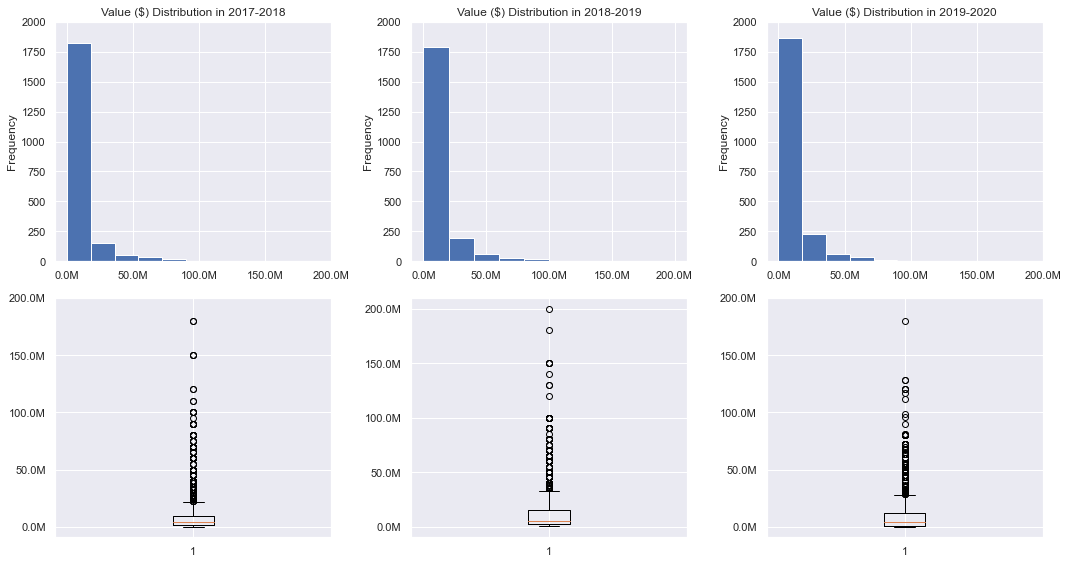

In [96]:
fig, ax = plt.subplots(2, 3, figsize=(15,8))

for i, yr in enumerate([2017, 2018, 2019]):
    df_yr = df[df['year'] == yr].dropna()
    

    ax[0,i].hist(df_yr.value)
    ax[0,i].set_title('Value ($) Distribution in %i-%i' % (yr, yr+1))
    ax[0,i].set_xticks(np.arange(df.value.min(), df.value.max()+50000000, 50_000_000))
    ax[0,i].set_ylabel('Frequency')
    ax[0,i].set_yticks(np.arange(0, 2250, 250))
    ax[0,i].xaxis.set_major_formatter(formatter)
    
    ax[1,i].boxplot(df_yr.value)
    ax[1,i].yaxis.set_major_formatter(formatter)
    ax[1,i].set_yticks(np.arange(df.value.min(), df.value.max()+50000000, 50_000_000))
        
    
plt.tight_layout()

